In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv('players (1).csv')

In [3]:
data.drop('link', inplace = True, axis = 1)
data.drop('bbrID', inplace = True, axis = 1)
data.drop('top_mean_ws48_rank', inplace = True, axis = 1)

rid columns that didn't mean anything to us

In [4]:
data.rename(columns={'nba_mean_wa_rank':'AvgWinsAddedRank'}, inplace=True)
data.rename(columns={'top_mean_vorp_rank':'T5AvgVORPRank'}, inplace=True)
data.rename(columns={'top_mean_pipm_rank':'T5AvgPlusMinusRank'}, inplace=True)
data.rename(columns={'top_mean_wa_rank':'AvgAddedValueRank'}, inplace=True)

data.rename(columns={'nba_mean_ws48_rank':'AvgRankWinShares'}, inplace=True)
data.rename(columns={'top_mean_wa':'AvgWinsAdded'}, inplace=True)
data.rename(columns={'top_mean_pipm':'AvgPlusminus'}, inplace=True)

data.rename(columns={'top_mean_vorp':'AvgValOverRepl'}, inplace=True)
data.rename(columns={'top_mean_ws48_rank':'AvgWinShares'}, inplace=True)
data.rename(columns={'nba_mean_wa':'T5AvgWinsAdded'}, inplace=True)
data.rename(columns={'recruit_year':'YearRecruited'}, inplace=True)
data.rename(columns={'nba_mean_vorp_rank':'AvgVORPRank'}, inplace=True)

data.rename(columns={'nba_mean_pipm_rank':'AvgPlusMinusRank'}, inplace=True)
data.rename(columns={'rank':'HSrank'}, inplace=True)

Renamed the raw data coumns to something more understandable

In [5]:
data.head(3)

,name,HSrank,draft_year,draft_rd,draft_pk,college,YearRecruited,pick_overall,pick_number,pick_round,...,AvgWinsAdded,AvgRankWinShares,AvgVORPRank,AvgPlusMinusRank,AvgWinsAddedRank,T5AvgVORPRank,T5AvgPlusMinusRank,AvgAddedValueRank,total_seasons,valid_seasons
0,Al Harrington,1.0,1998.0,1.0,25.0,NaN,1998.0,25.0,25.0,1.0,...,3.946,134.363636,129.727273,122.181818,118.727273,114.0,86.8,79.8,16.0,11.0
1,Rashard Lewis,2.0,1998.0,2.0,32.0,NaN,1998.0,32.0,32.0,2.0,...,11.672,55.916667,44.416667,56.083333,55.166667,21.8,19.4,18.2,16.0,12.0
2,Korleone Young,3.0,1998.0,2.0,40.0,NaN,1998.0,40.0,40.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0


In [6]:
abs(data.corr().loc['AvgWinsAdded']).nlargest(13)

AvgWinsAdded          1.000000
AvgPlusminus          0.972523
T5AvgWinsAdded        0.970837
AvgAddedValueRank     0.933058
AvgValOverRepl        0.924952
T5AvgPlusMinusRank    0.918313
nba_mean_pipm         0.915954
AvgWinsAddedRank      0.906175
nba_mean_vorp         0.890290
AvgPlusMinusRank      0.874604
T5AvgVORPRank         0.858037
AvgVORPRank           0.822672
top_mean_ws48         0.821972
Name: AvgWinsAdded, dtype: float64

Find the highest correlated values to Avg Wins Added. Felt like this was the most important stat to look at since the rest dont really matter without adding wins to a team. 

In [7]:
corrvars = ['AvgPlusminus', 'T5AvgWinsAdded', 'AvgAddedValueRank', 'T5AvgPlusMinusRank', 'nba_mean_pipm', 'AvgWinsAddedRank', 'nba_mean_vorp', 'AvgPlusMinusRank', 'T5AvgVORPRank', 'AvgVORPRank', 'top_mean_ws48' ]

In [8]:
tdata = data[corrvars].fillna(0)
tdata.head(5)

,AvgPlusminus,T5AvgWinsAdded,AvgAddedValueRank,T5AvgPlusMinusRank,nba_mean_pipm,AvgWinsAddedRank,nba_mean_vorp,AvgPlusMinusRank,T5AvgVORPRank,AvgVORPRank,top_mean_ws48
0,0.282,2.030000,79.8,86.8,-0.905455,118.727273,0.536364,122.181818,114.0,129.727273,0.0958
1,3.142,7.520833,18.2,19.4,1.532500,55.166667,2.858333,56.083333,21.8,44.416667,0.1556
2,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0000
3,1.550,4.600000,73.0,53.0,1.550000,73.000000,0.900000,53.000000,108.0,108.000000,0.1400
4,-1.310,0.970000,127.0,119.5,-1.310000,127.000000,0.450000,119.500000,125.0,125.000000,0.1245


Text(0.5, 1.0, 'Correlation Heatmap')

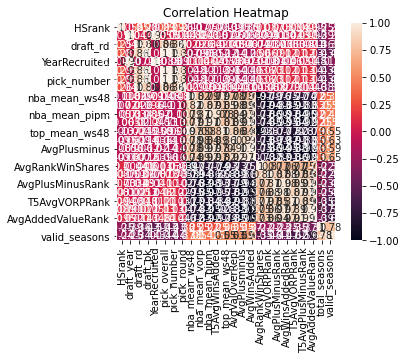

In [9]:
hm = sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, fmt='.2g', square = True)
hm.set_title("Correlation Heatmap")

Very messy heatmap. Too many variables. 

In [10]:
numcols = ['HSrank', 'draft_rd', 'draft_pk', 'pick_overall', 'pick_number', 'pick_round',
       'nba_mean_ws48', 'nba_mean_vorp', 'nba_mean_pipm', 'T5AvgWinsAdded',
       'top_mean_ws48', 'AvgValOverRepl', 'AvgPlusminus', 'AvgWinsAdded',
       'AvgRankWinShares', 'AvgVORPRank', 'AvgPlusMinusRank',
       'AvgWinsAddedRank', 'T5AvgVORPRank', 'T5AvgPlusMinusRank',
       'AvgAddedValueRank', 'total_seasons', 'valid_seasons']

In [11]:
data[numcols].head(5)

,HSrank,draft_rd,draft_pk,pick_overall,pick_number,pick_round,nba_mean_ws48,nba_mean_vorp,nba_mean_pipm,T5AvgWinsAdded,...,AvgWinsAdded,AvgRankWinShares,AvgVORPRank,AvgPlusMinusRank,AvgWinsAddedRank,T5AvgVORPRank,T5AvgPlusMinusRank,AvgAddedValueRank,total_seasons,valid_seasons
0,1.0,1.0,25.0,25.0,25.0,1.0,0.073909,0.536364,-0.905455,2.030000,...,3.946,134.363636,129.727273,122.181818,118.727273,114.0,86.8,79.8,16.0,11.0
1,2.0,2.0,32.0,32.0,32.0,2.0,0.135250,2.858333,1.532500,7.520833,...,11.672,55.916667,44.416667,56.083333,55.166667,21.8,19.4,18.2,16.0,12.0
2,3.0,2.0,40.0,40.0,40.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
3,4.0,2.0,34.0,33.0,34.0,2.0,0.140000,0.900000,1.550000,4.600000,...,4.600,47.000000,108.000000,53.000000,73.000000,108.0,53.0,73.0,10.0,1.0
4,5.0,1.0,2.0,2.0,2.0,1.0,0.124500,0.450000,-1.310000,0.970000,...,0.970,68.500000,125.000000,119.500000,127.000000,125.0,119.5,127.0,9.0,2.0


In [12]:
numdata = data[numcols].fillna(0)

In [13]:
numdata

,HSrank,draft_rd,draft_pk,pick_overall,pick_number,pick_round,nba_mean_ws48,nba_mean_vorp,nba_mean_pipm,T5AvgWinsAdded,...,AvgWinsAdded,AvgRankWinShares,AvgVORPRank,AvgPlusMinusRank,AvgWinsAddedRank,T5AvgVORPRank,T5AvgPlusMinusRank,AvgAddedValueRank,total_seasons,valid_seasons
0,1.0,1.0,25.0,25.0,25.0,1.0,0.073909,0.536364,-0.905455,2.030000,...,3.946,134.363636,129.727273,122.181818,118.727273,114.00,86.800000,79.8,16.0,11.0
1,2.0,2.0,32.0,32.0,32.0,2.0,0.135250,2.858333,1.532500,7.520833,...,11.672,55.916667,44.416667,56.083333,55.166667,21.80,19.400000,18.2,16.0,12.0
2,3.0,2.0,40.0,40.0,40.0,2.0,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,1.0,0.0
3,4.0,2.0,34.0,33.0,34.0,2.0,0.140000,0.900000,1.550000,4.600000,...,4.600,47.000000,108.000000,53.000000,73.000000,108.00,53.000000,73.0,10.0,1.0
4,5.0,1.0,2.0,2.0,2.0,1.0,0.124500,0.450000,-1.310000,0.970000,...,0.970,68.500000,125.000000,119.500000,127.000000,125.00,119.500000,127.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,0.0,0.0,0.0,38.0,38.0,2.0,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,5.0,0.0
1869,0.0,0.0,0.0,24.0,24.0,1.0,0.097500,1.650000,-1.300000,1.485000,...,1.485,106.000000,77.500000,134.500000,132.500000,77.50,134.500000,132.5,6.0,2.0
1870,0.0,0.0,0.0,22.0,22.0,1.0,0.149250,1.700000,0.890000,4.520000,...,4.520,40.750000,72.750000,72.250000,81.500000,72.75,72.250000,81.5,7.0,4.0
1871,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,1.0,0.0


In [14]:
#hm = sns.heatmap(numdata.corr(), annot = True, vmin=-1, vmax=1, fmt='.2g', square = True)
#hm.set_title("Correlation Heatmap")

In [15]:
x = tdata
y = data['AvgWinsAdded'].fillna(0)
x.head(5)

,AvgPlusminus,T5AvgWinsAdded,AvgAddedValueRank,T5AvgPlusMinusRank,nba_mean_pipm,AvgWinsAddedRank,nba_mean_vorp,AvgPlusMinusRank,T5AvgVORPRank,AvgVORPRank,top_mean_ws48
0,0.282,2.030000,79.8,86.8,-0.905455,118.727273,0.536364,122.181818,114.0,129.727273,0.0958
1,3.142,7.520833,18.2,19.4,1.532500,55.166667,2.858333,56.083333,21.8,44.416667,0.1556
2,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0000
3,1.550,4.600000,73.0,53.0,1.550000,73.000000,0.900000,53.000000,108.0,108.000000,0.1400
4,-1.310,0.970000,127.0,119.5,-1.310000,127.000000,0.450000,119.500000,125.0,125.000000,0.1245


In [16]:
y

0        3.946
1       11.672
2        0.000
3        4.600
4        0.970
         ...  
1868     0.000
1869     1.485
1870     4.520
1871     0.000
1872     5.290
Name: AvgWinsAdded, Length: 1873, dtype: float64

In [17]:
X1 = sm.add_constant(x)
reg1 = sm.OLS(y, X1)
fit1 = reg1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AvgWinsAdded   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 9.684e+04
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:20:46   Log-Likelihood:                 1714.6
No. Observations:                1873   AIC:                            -3405.
Df Residuals:                    1861   BIC:                            -3339.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0003      0.003      0.121      0.903      -0.005       0.005
AvgPlusminus           2.2223      0.027     82.326      0.000       2.169       2.275
T5AvgWinsAdded         1.1885      0.013     93.735      0.000       1.164       1.213
AvgAddedValueRank     -0.0588      0.003    -18.028      0.000      -0.065      -0.052
T5AvgPlusMinusRank     0.0696      0.003     21.493      0.000       0.063       0.076
nba_mean_pipm         -2.5496      0.033    -76.415      0.000      -2.615      -2.484
AvgWinsAddedRank       0.0676      0.003     19.392      0.000       0.061       0.074
nba_mean_vorp         -0.1555      0.023     -6.876      0.000      -0.200      -0.111
AvgPlusMinusRank      -0.0805      0.003    -23.244      0.000      -0.087      -0.074
T5AvgVORPRank          0.0010      0.001      0.829      0.407      -0.001       0.003
AvgVORPRank           -0.0043      0.001     -3.226      0.001      -0.007      -0.002
top_mean_ws48          0.3952      0.213      1.856      0.064      -0.022       0.813
==============================================================================
Omnibus:                      942.537   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           222288.976
Skew:                           1.186   Prob(JB):                         0.00
Kurtosis:                      56.317   Cond. No.                     1.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
corrvars2 = ['AvgPlusminus', 'T5AvgWinsAdded', 'AvgAddedValueRank', 'T5AvgPlusMinusRank', 'nba_mean_pipm', 'AvgWinsAddedRank', 'nba_mean_vorp', 'AvgPlusMinusRank', 'AvgVORPRank', 'top_mean_ws48' ]
tdata2 = data[corrvars2].fillna(0)

Backward elimination to get rid of variables with large p values. These variables have a high likelihood of being zero. 

In [19]:
x = tdata2
X2 = sm.add_constant(x)
reg2 = sm.OLS(y, X2)
fit2 = reg2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AvgWinsAdded   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.065e+05
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:20:47   Log-Likelihood:                 1714.3
No. Observations:                1873   AIC:                            -3407.
Df Residuals:                    1862   BIC:                            -3346.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0003      0.003      0.120      0.904      -0.005       0.005
AvgPlusminus           2.2224      0.027     82.337      0.000       2.169       2.275
T5AvgWinsAdded         1.1888      0.013     93.790      0.000       1.164       1.214
AvgAddedValueRank     -0.0578      0.003    -18.940      0.000      -0.064      -0.052
T5AvgPlusMinusRank     0.0695      0.003     21.486      0.000       0.063       0.076
nba_mean_pipm         -2.5496      0.033    -76.423      0.000      -2.615      -2.484
AvgWinsAddedRank       0.0667      0.003     20.168      0.000       0.060       0.073
nba_mean_vorp         -0.1547      0.023     -6.847      0.000      -0.199      -0.110
AvgPlusMinusRank      -0.0805      0.003    -23.242      0.000      -0.087      -0.074
AvgVORPRank           -0.0033      0.001     -6.150      0.000      -0.004      -0.002
top_mean_ws48          0.3669      0.210      1.746      0.081      -0.045       0.779
==============================================================================
Omnibus:                      945.467   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           224883.264
Skew:                           1.192   Prob(JB):                         0.00
Kurtosis:                      56.627   Cond. No.                     1.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
corrvars3 = ['AvgPlusminus', 'T5AvgWinsAdded', 'AvgAddedValueRank', 'T5AvgPlusMinusRank', 'nba_mean_pipm', 'AvgWinsAddedRank', 'nba_mean_vorp', 'AvgPlusMinusRank', 'AvgVORPRank',  ]
tdata3 = data[corrvars3].fillna(0)

In [21]:
x = tdata3
X3 = sm.add_constant(x)
reg3 = sm.OLS(y, X3)
fit3 = reg3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AvgWinsAdded   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.183e+05
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:20:47   Log-Likelihood:                 1712.7
No. Observations:                1873   AIC:                            -3405.
Df Residuals:                    1863   BIC:                            -3350.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0003      0.003      0.133      0.894      -0.005       0.005
AvgPlusminus           2.2207      0.027     82.282      0.000       2.168       2.274
T5AvgWinsAdded         1.1875      0.013     93.797      0.000       1.163       1.212
AvgAddedValueRank     -0.0584      0.003    -19.203      0.000      -0.064      -0.052
T5AvgPlusMinusRank     0.0697      0.003     21.528      0.000       0.063       0.076
nba_mean_pipm         -2.5395      0.033    -77.262      0.000      -2.604      -2.475
AvgWinsAddedRank       0.0675      0.003     20.567      0.000       0.061       0.074
nba_mean_vorp         -0.1428      0.022     -6.626      0.000      -0.185      -0.101
AvgPlusMinusRank      -0.0806      0.003    -23.295      0.000      -0.087      -0.074
AvgVORPRank           -0.0032      0.001     -6.017      0.000      -0.004      -0.002
==============================================================================
Omnibus:                      925.001   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           224930.403
Skew:                           1.132   Prob(JB):                         0.00
Kurtosis:                      56.638   Cond. No.                     2.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We seem to be overfitting, but we can conclude that these are the variables that we need from backward elimination to predict average wins added for a team. However, there could be some problems when it comes to testing and training. 

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xx= data[corrvars3].fillna(0)
y= data['AvgWinsAdded'].fillna(0)

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(xx, y, test_size=0.2, random_state = 3)

In [25]:
modelxx=sm.OLS(ytrain,sm.add_constant(xtrain)).fit()
modelxx.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AvgWinsAdded   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 8.915e+04
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:20:47   Log-Likelihood:                 1305.1
No. Observations:                1498   AIC:                            -2590.
Df Residuals:                    1488   BIC:                            -2537.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0005      0.003      0.159      0.874      -0.005       0.006
AvgPlusminus           2.1680      0.031     68.843      0.000       2.106       2.230
T5AvgWinsAdded         1.1957      0.015     80.999      0.000       1.167       1.225
AvgAddedValueRank     -0.0585      0.004    -16.467      0.000      -0.065      -0.051
T5AvgPlusMinusRank     0.0670      0.004     17.298      0.000       0.059       0.075
nba_mean_pipm         -2.5154      0.038    -65.735      0.000      -2.590      -2.440
AvgWinsAddedRank       0.0686      0.004     18.293      0.000       0.061       0.076
nba_mean_vorp         -0.1405      0.025     -5.697      0.000      -0.189      -0.092
AvgPlusMinusRank      -0.0794      0.004    -19.614      0.000      -0.087      -0.071
AvgVORPRank           -0.0033      0.001     -5.419      0.000      -0.005      -0.002
==============================================================================
Omnibus:                      716.095   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           142228.529
Skew:                           1.085   Prob(JB):                         0.00
Kurtosis:                      50.686   Cond. No.                     1.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
ypred =modelxx.predict(sm.add_constant(xtest))

In [27]:
from sklearn.metrics import r2_score
r2_score(ytest, ypred)

0.9986745308005851

In [28]:
print(ypred)

686     0.000464
1502    0.000464
989     1.831855
951     0.000464
1525    0.000464
          ...   
1336    0.000464
1548    0.000464
1260    0.000464
48      0.000464
1163    0.000464
Length: 375, dtype: float64


In [29]:
y

0        3.946
1       11.672
2        0.000
3        4.600
4        0.970
         ...  
1868     0.000
1869     1.485
1870     4.520
1871     0.000
1872     5.290
Name: AvgWinsAdded, Length: 1873, dtype: float64

In [30]:
ytest

686     0.000
1502    0.000
989     1.884
951     0.000
1525    0.000
        ...  
1336    0.000
1548    0.000
1260    0.000
48      0.000
1163    0.000
Name: AvgWinsAdded, Length: 375, dtype: float64

In [31]:
from sklearn.linear_model import LinearRegression
RLR = LinearRegression().fit(xtrain, ytrain)
LRtrainpred = RLR.predict(xtrain)
LRtestpred = RLR.predict(xtest)

In [32]:
from sklearn import metrics
trainmse = metrics.mean_squared_error(ytrain, LRtrainpred)
testmse = metrics.mean_squared_error(ytest, LRtestpred) 

In [33]:
print("RLR train MSE:", trainmse)
print("RLR test MSE:", testmse)

RLR train MSE: 0.010251203134531242
RLR test MSE: 0.006301608992727013


Very very small mean square error. Concerning. 

In [34]:
data[corrvars3].mean(axis=0)

AvgPlusminus           -0.044230
T5AvgWinsAdded          3.056847
AvgAddedValueRank     103.453523
T5AvgPlusMinusRank    102.407091
nba_mean_pipm          -0.397948
AvgWinsAddedRank      112.101220
nba_mean_vorp           1.070368
AvgPlusMinusRank      111.032492
AvgVORPRank           109.170212
dtype: float64

In [35]:
efficentplayers = data[(data['AvgPlusminus'] >= 0)  & (data["AvgVORPRank"] > 109) & (data['AvgAddedValueRank'] > 100)].reset_index()
efficentplayers

,index,name,HSrank,draft_year,draft_rd,draft_pk,college,YearRecruited,pick_overall,pick_number,...,AvgWinsAdded,AvgRankWinShares,AvgVORPRank,AvgPlusMinusRank,AvgWinsAddedRank,T5AvgVORPRank,T5AvgPlusMinusRank,AvgAddedValueRank,total_seasons,valid_seasons
0,119,Brian Cook,20.0,2003.0,1.0,24.0,University of Illinois at Urbana-Champaign,1999.0,24.0,24.0,...,2.5900,43.00,136.0,82.0,111.00,136.0,82.0,111.00,9.0,1.0
1,450,Steve Novak,57.0,2006.0,2.0,32.0,Marquette University,2002.0,32.0,32.0,...,3.3300,83.00,128.0,83.0,105.00,128.0,83.0,105.00,11.0,1.0
2,698,C.J. Miles,12.0,2005.0,2.0,34.0,NaN,2005.0,34.0,34.0,...,3.1825,118.25,134.0,93.5,103.25,134.0,93.5,103.25,13.0,4.0


In [36]:
efficentplayers['draft_pk'].mean()

30.0

In [37]:
efficentplayers['HSrank'].mean()

29.666666666666668

In [38]:
efficentplayers['HSrank'].median()

20.0

We can look for efficent players that are similar to these efficent NBA players by looking in the bottom of the first round and top of the second round picks. This means that general managers can trade their first round draft picks for current high producing players in return for for high second round picks. This will give them the most value for their first round draft picks. 

In [39]:
winners = data[(data['AvgWinsAddedRank'] > 50)]
winners.head(5)

,name,HSrank,draft_year,draft_rd,draft_pk,college,YearRecruited,pick_overall,pick_number,pick_round,...,AvgWinsAdded,AvgRankWinShares,AvgVORPRank,AvgPlusMinusRank,AvgWinsAddedRank,T5AvgVORPRank,T5AvgPlusMinusRank,AvgAddedValueRank,total_seasons,valid_seasons
0,Al Harrington,1.0,1998.0,1.0,25.0,NaN,1998.0,25.0,25.0,1.0,...,3.946000,134.363636,129.727273,122.181818,118.727273,114.000000,86.8,79.8,16.0,11.0
1,Rashard Lewis,2.0,1998.0,2.0,32.0,NaN,1998.0,32.0,32.0,2.0,...,11.672000,55.916667,44.416667,56.083333,55.166667,21.800000,19.4,18.2,16.0,12.0
3,Dan Gadzuric,4.0,2002.0,2.0,34.0,"University of California, Los Angeles",1998.0,33.0,34.0,2.0,...,4.600000,47.000000,108.000000,53.000000,73.000000,108.000000,53.0,73.0,10.0,1.0
4,Stromile Swift,5.0,2000.0,1.0,2.0,Louisiana State University,1998.0,2.0,2.0,1.0,...,0.970000,68.500000,125.000000,119.500000,127.000000,125.000000,119.5,127.0,9.0,2.0
7,Joel Przybilla,8.0,2000.0,1.0,9.0,University of Minnesota,1998.0,9.0,9.0,1.0,...,3.893333,60.000000,107.333333,80.000000,88.000000,107.333333,80.0,88.0,13.0,3.0


In [40]:
data['Quality Pick'] = 'Poor'

data['Quality Pick'].loc[data['AvgWinsAddedRank'] < 125 ] = 'Average'

data['Quality Pick'].loc[data['AvgWinsAddedRank'] < 75 ] = 'Great'

C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [41]:
data.groupby(['draft_rd', 'Quality Pick']).mean().reset_index()

,draft_rd,Quality Pick,HSrank,draft_year,draft_pk,YearRecruited,pick_overall,pick_number,pick_round,nba_mean_ws48,...,AvgWinsAdded,AvgRankWinShares,AvgVORPRank,AvgPlusMinusRank,AvgWinsAddedRank,T5AvgVORPRank,T5AvgPlusMinusRank,AvgAddedValueRank,total_seasons,valid_seasons
0,1.0,Average,25.037500,2007.225000,13.487500,2005.050000,13.487500,13.487500,1.0,0.099285,...,4.278375,102.553180,99.250971,97.428771,98.109467,86.778333,84.406875,85.098125,9.337500,5.862500
1,1.0,Great,16.738095,2007.166667,8.785714,2005.642857,8.785714,8.785714,1.0,0.150596,...,10.148127,54.112885,48.736066,49.304828,49.319384,30.860317,29.721825,29.969444,10.285714,8.142857
2,1.0,Poor,26.178571,2007.407143,15.700000,2005.214286,15.700000,15.700000,1.0,0.069757,...,0.722795,135.820053,144.369590,151.081047,151.300662,140.294378,147.408032,147.448594,6.550000,2.221429
3,2.0,Average,25.375000,2006.187500,39.250000,2003.812500,39.125000,39.250000,2.0,0.101552,...,4.016188,99.183396,102.508166,102.005249,104.633604,91.440625,89.756250,91.431250,10.250000,5.250000
4,2.0,Great,41.428571,2007.000000,40.000000,2004.500000,39.857143,40.000000,2.0,0.135469,...,8.123393,61.036338,50.720550,54.927409,58.626162,42.592857,44.364286,47.996429,9.642857,5.785714
5,2.0,Poor,40.156522,2007.991304,44.147826,2004.721739,44.043478,44.147826,2.0,0.074991,...,0.863561,133.327130,142.047306,149.227005,150.038722,140.185965,146.522807,147.469298,3.495652,0.591304


In [42]:
data.groupby(['draft_rd', 'Quality Pick']).count().reset_index()

,draft_rd,Quality Pick,name,HSrank,draft_year,draft_pk,college,YearRecruited,pick_overall,pick_number,...,AvgWinsAdded,AvgRankWinShares,AvgVORPRank,AvgPlusMinusRank,AvgWinsAddedRank,T5AvgVORPRank,T5AvgPlusMinusRank,AvgAddedValueRank,total_seasons,valid_seasons
0,1.0,Average,80,80,80,80,72,80,80,80,...,80,80,80,80,80,80,80,80,80,80
1,1.0,Great,42,42,42,42,36,42,42,42,...,42,42,42,42,42,42,42,42,42,42
2,1.0,Poor,140,140,140,140,127,140,140,140,...,83,83,83,83,83,83,83,83,140,140
3,2.0,Average,16,16,16,16,13,16,16,16,...,16,16,16,16,16,16,16,16,16,16
4,2.0,Great,14,14,14,14,12,14,14,14,...,14,14,14,14,14,14,14,14,14,14
5,2.0,Poor,115,115,115,115,110,115,115,115,...,19,19,19,19,19,19,19,19,115,115


In [43]:
greatpicks = data[(data['Quality Pick'] == 'Great')]
greatpicks.head()

,name,HSrank,draft_year,draft_rd,draft_pk,college,YearRecruited,pick_overall,pick_number,pick_round,...,AvgRankWinShares,AvgVORPRank,AvgPlusMinusRank,AvgWinsAddedRank,T5AvgVORPRank,T5AvgPlusMinusRank,AvgAddedValueRank,total_seasons,valid_seasons,Quality Pick
1,Rashard Lewis,2.0,1998.0,2.0,32.0,NaN,1998.0,32.0,32.0,2.0,...,55.916667,44.416667,56.083333,55.166667,21.8,19.4,18.2,16.0,12.0,Great
3,Dan Gadzuric,4.0,2002.0,2.0,34.0,"University of California, Los Angeles",1998.0,33.0,34.0,2.0,...,47.000000,108.000000,53.000000,73.000000,108.0,53.0,73.0,10.0,1.0,Great
124,Joe Johnson,25.0,2001.0,1.0,10.0,University of Arkansas,1999.0,10.0,10.0,1.0,...,110.562500,77.187500,88.562500,74.812500,30.6,40.6,26.8,17.0,16.0,Great
177,Jamario Moon,79.0,NaN,NaN,NaN,Meridian Community College,1999.0,NaN,NaN,NaN,...,77.000000,56.500000,41.500000,57.500000,56.5,41.5,57.5,5.0,2.0,Great
197,Gilbert Arenas,99.0,2001.0,2.0,31.0,University of Arizona,1999.0,30.0,31.0,2.0,...,78.666667,48.333333,63.500000,62.500000,25.6,45.2,44.2,11.0,6.0,Great


In [44]:
draftsteals = greatpicks[(greatpicks['draft_rd'] > 1.0)]
print(draftsteals['name'])

1          Rashard Lewis
3           Dan Gadzuric
197       Gilbert Arenas
512         Trevor Ariza
557         Paul Millsap
687       Josh McRoberts
700         Amir Johnson
701          Danny Green
858     Patrick Beverley
895       DeAndre Jordan
921     Chandler Parsons
1073      Draymond Green
1173     Khris Middleton
1212       Dwight Powell
Name: name, dtype: object


Text(0.5, 1.0, 'Correlation Heatmap')

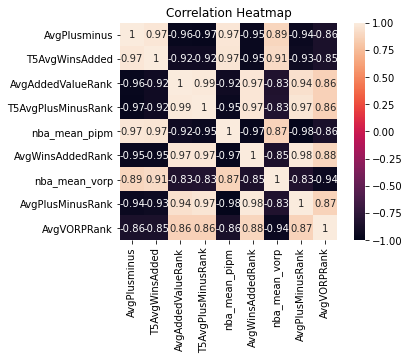

In [45]:
d2 = data[corrvars3]
hm2 = sns.heatmap(d2.corr(), annot = True, vmin=-1, vmax=1, fmt='.2g', square = True)
hm2.set_title("Correlation Heatmap")

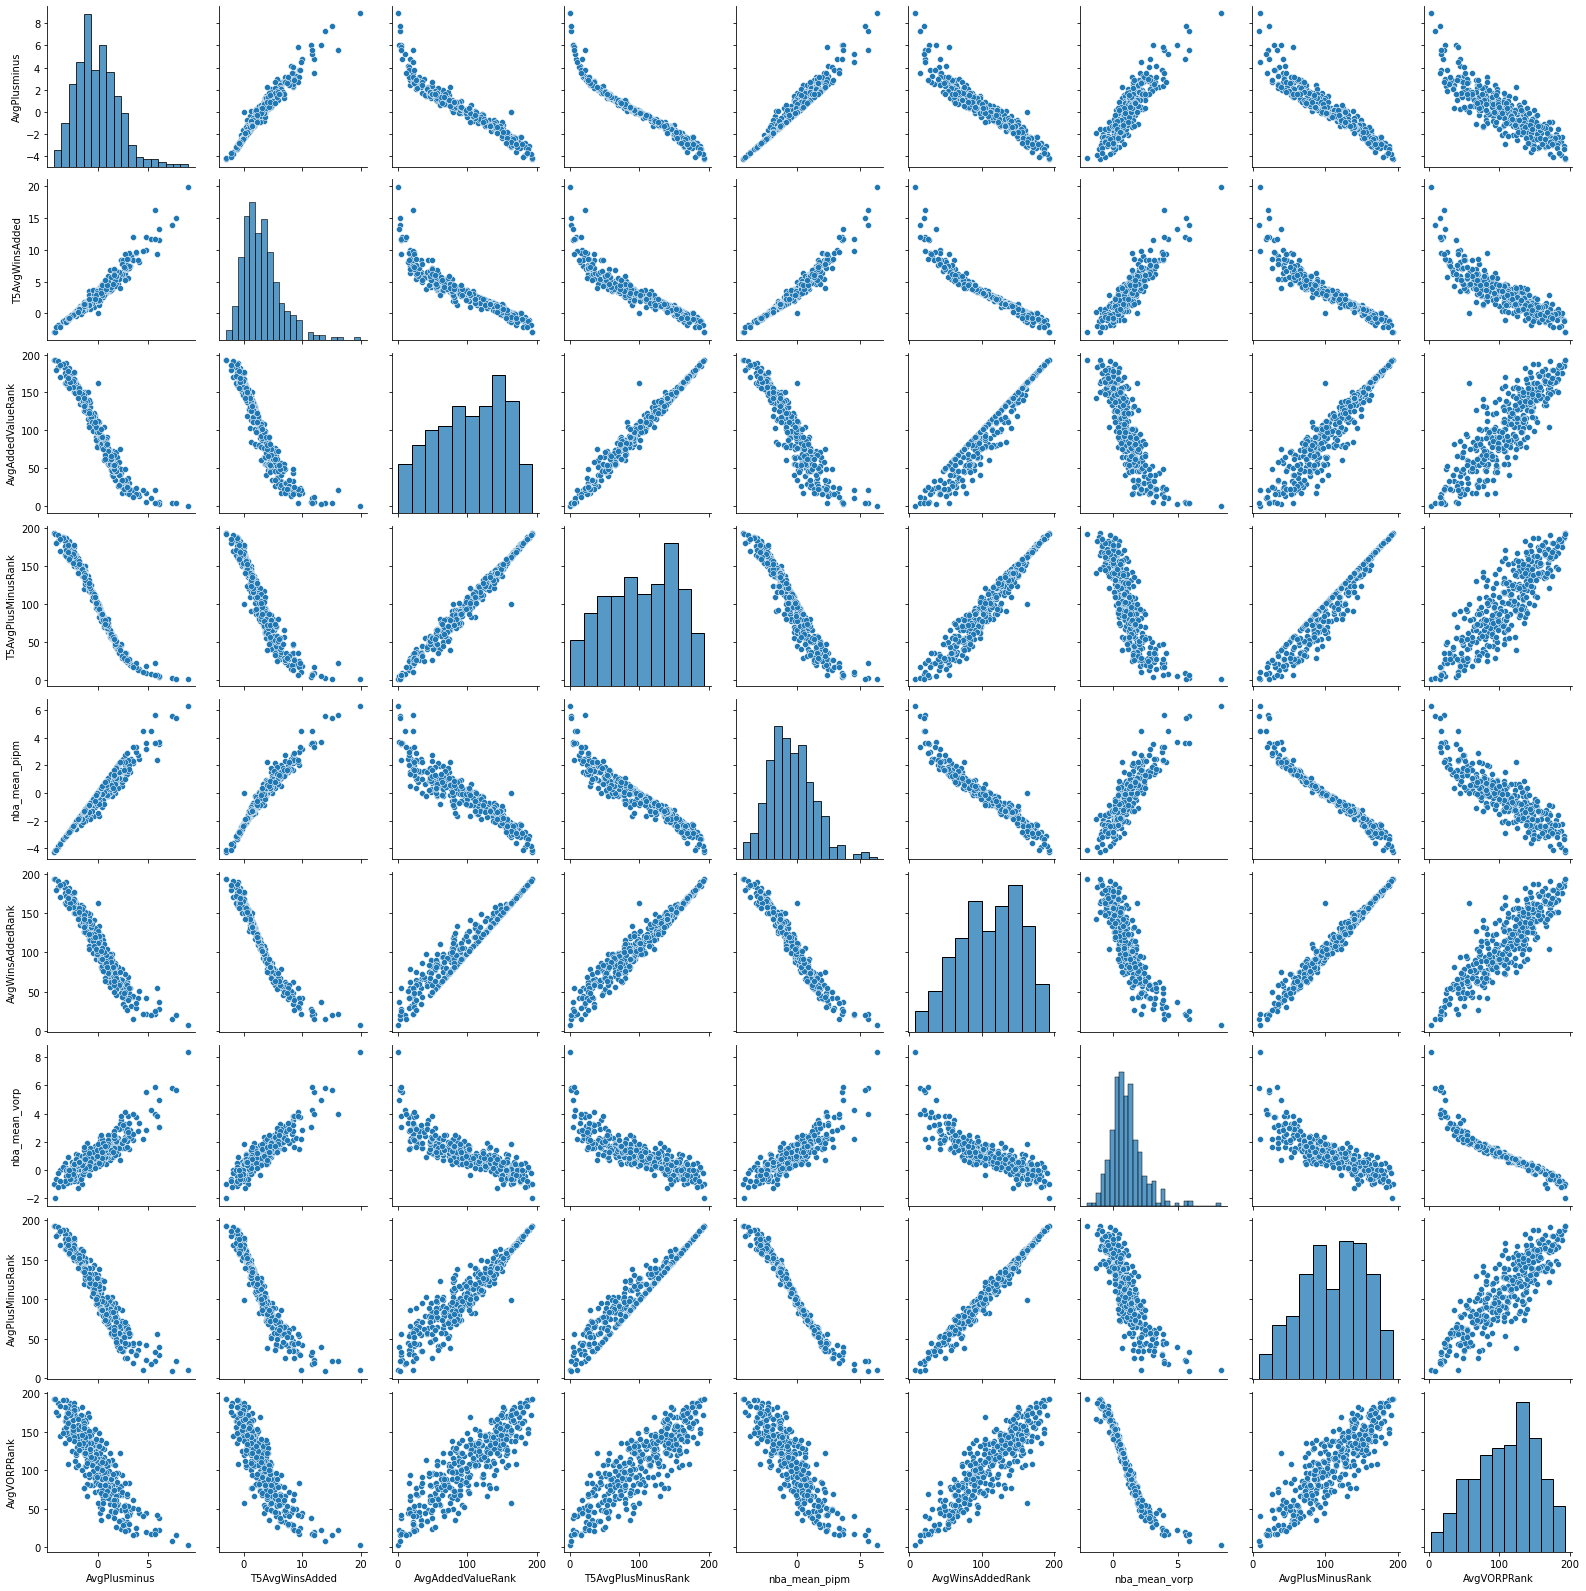

In [46]:
sns.pairplot(d2)

In [47]:
draftsteals['college'].count()

12

In [48]:
from collections import Counter

In [49]:
my_list = greatpicks['college']
counter = Counter(my_list)
counter

Counter({nan: 9,
         'University of California, Los Angeles': 6,
         'University of Arkansas': 2,
         'Meridian Community College': 1,
         'University of Arizona': 2,
         'University of Alabama': 1,
         'Syracuse University': 1,
         'Georgia Institute of Technology': 1,
         'University of Washington': 2,
         'University of Illinois at Urbana-Champaign': 1,
         'Duke University': 3,
         'Wake Forest University': 3,
         'University of Minnesota': 1,
         'Louisiana Tech University': 1,
         'University of Texas at Austin': 2,
         'University of Kentucky': 4,
         'Villanova University': 1,
         'University of Florida': 3,
         'University of North Carolina': 2,
         'Ohio State University': 2,
         'Texas A&M University': 2,
         'University of Oklahoma': 1,
         'Arizona State University': 1,
         'University of Connecticut': 2,
         'Washington State University': 1,
         'Mi

In [50]:
print('\n'.join('{}: {}'.format(*k) for k in enumerate(counter)))

0: nan
1: University of California, Los Angeles
2: University of Arkansas
3: Meridian Community College
4: University of Arizona
5: University of Alabama
6: Syracuse University
7: Georgia Institute of Technology
8: University of Washington
9: University of Illinois at Urbana-Champaign
10: Duke University
11: Wake Forest University
12: University of Minnesota
13: Louisiana Tech University
14: University of Texas at Austin
15: University of Kentucky
16: Villanova University
17: University of Florida
18: University of North Carolina
19: Ohio State University
20: Texas A&M University
21: University of Oklahoma
22: Arizona State University
23: University of Connecticut
24: Washington State University
25: Michigan State University
26: San Diego State University
27: Stanford University
28: Indiana University
29: Georgetown University
30: University of Pittsburgh
31: University of Kansas
32:  Oklahoma State University
33: Marquette University
34: Creighton University
35: Davidson College
36: W

As we can see from our data, many great picks come undrafted or from colleges like UCLA, Kentucky, Duke, Wake Forest, 

In [51]:
my_list = draftsteals['college']
print(Counter(my_list))

Counter({nan: 2, 'University of California, Los Angeles': 2, 'Texas A&M University': 2, 'University of Arizona': 1, 'Louisiana Tech University': 1, 'Duke University': 1, 'University of North Carolina': 1, 'University of Arkansas': 1, 'University of Florida': 1, 'Michigan State University': 1, 'Stanford University': 1})


In [52]:
print('\n'.join('{}: {}'.format(*k) for k in enumerate(my_list)))

0: nan
1: University of California, Los Angeles
2: University of Arizona
3: University of California, Los Angeles
4: Louisiana Tech University
5: Duke University
6: nan
7: University of North Carolina
8: University of Arkansas
9: Texas A&M University
10: University of Florida
11: Michigan State University
12: Texas A&M University
13: Stanford University


These schools have some of the best producing players in the NBA, if we are deciding between similar players, perhaps the school that they went to and the competition that they played against will be a factor in their NBA success.

In [53]:
draftsteals.HSrank.mean()

41.42857142857143

In [54]:
draftsteals['draft_pk'].mean()

40.0